In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
project_dir = 'drive/MyDrive/Colab Notebooks/'
file_name = 'german_credit_data.csv'

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score,roc_curve, roc_auc_score, confusion_matrix



In [8]:
#Reading the input file
df = pd.read_csv(project_dir+file_name)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


# **Summary statistics for numeric columns**

In [9]:
numeric_summary = df.describe()
print(numeric_summary)

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


In [10]:
df = df.drop(columns=['Unnamed: 0'])

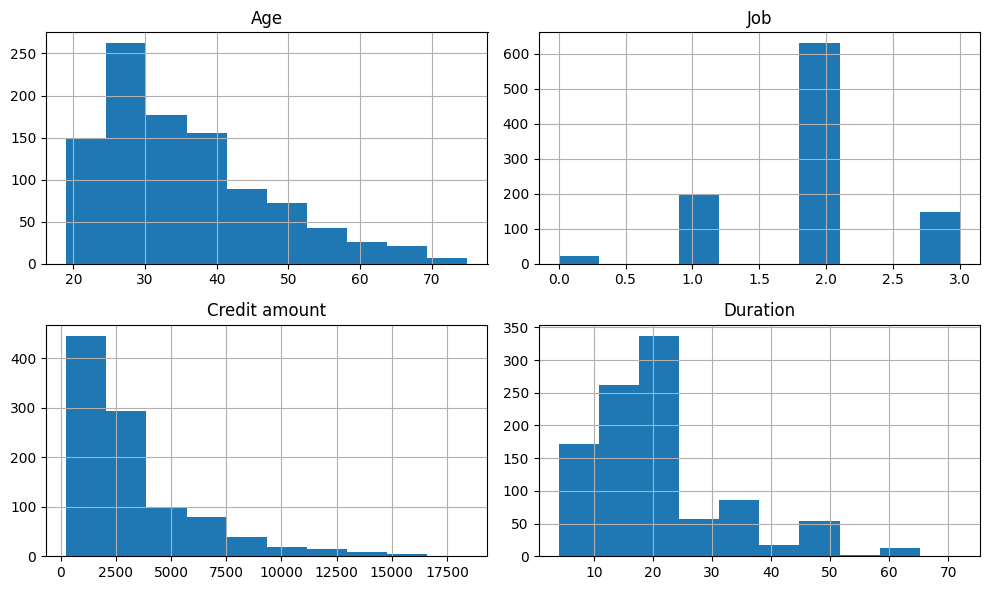

In [11]:
#Plotting histogram for numeric columns
numeric_columns = ['Age', 'Job', 'Credit amount', 'Duration']
df[numeric_columns].hist(bins=10, figsize=(10,6), layout=(2,2))
plt.tight_layout()
plt.show()

In [12]:
for cols in numeric_columns:
  print(df[cols].value_counts().sort_index(ascending=True))

Age
19     2
20    14
21    14
22    27
23    48
24    44
25    41
26    50
27    51
28    43
29    37
30    40
31    38
32    34
33    33
34    32
35    40
36    39
37    29
38    24
39    21
40    25
41    17
42    22
43    17
44    17
45    15
46    18
47    17
48    12
49    14
50    12
51     8
52     9
53     7
54    10
55     8
56     3
57     9
58     5
59     3
60     6
61     7
62     2
63     8
64     5
65     5
66     5
67     3
68     3
70     1
74     4
75     2
Name: count, dtype: int64
Job
0     22
1    200
2    630
3    148
Name: count, dtype: int64
Credit amount
250      1
276      1
338      1
339      1
343      1
        ..
15653    1
15672    1
15857    1
15945    1
18424    1
Name: count, Length: 921, dtype: int64
Duration
4       6
5       1
6      75
7       5
8       7
9      49
10     28
11      9
12    179
13      4
14      4
15     64
16      2
18    113
20      8
21     30
22      2
24    184
26      1
27     13
28      3
30     40
33      3
36     83
39  

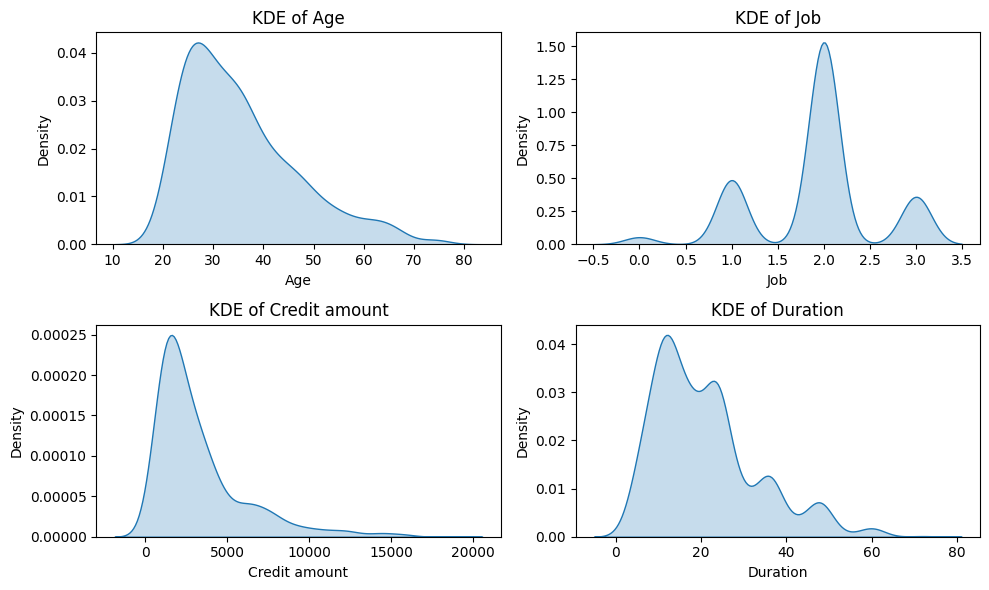

In [13]:
# Set up the figure and axes; creates a 2x2 grid of subplots in a single figure. This means there will be four subplots arranged in two rows and two columns.
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten the axes array for easy iteration; axes is originally a 2D array with shape (2, 2).flatten() converts this 2D array into a 1D array for easier iteration. So now axes is a 1D array with four axes objects.
axes = axes.flatten()

# Create KDE plots for each numeric column
#enumerate(numeric_columns) allows iteration over numeric_columns with both the index i and the column name col.
#creates a Kernel Density Estimate (KDE) plot for the specified column df[col]; ax=axes[i] specifies which subplot to draw the KDE plot on; fill=True fills the area under the KDE curve
#axes[i].set_title() sets the title of the subplot

for i, col in enumerate(numeric_columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
AgePer = (df[df['Age'] <= 40].shape[0]/df.shape[0])*100
print("% of people under age 40:",AgePer)

JobPer = (df[df['Job'] == 2].shape[0]/df.shape[0])*100
print("% of people with Skilled job:",JobPer)

CreditPer = (df[df['Credit amount'] <= 5000].shape[0]/df.shape[0])*100
print("% of people with less than 5000 credit amount:",CreditPer)

DurationPer = (df[df['Duration'] <= 24].shape[0]/df.shape[0])*100
print("% of people with less than 2 years of tenure with the bank:",DurationPer)

% of people under age 40: 72.6
% of people with Skilled job: 63.0
% of people with less than 5000 credit amount: 81.2
% of people with less than 2 years of tenure with the bank: 77.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


## **Summary statistics for categorical columns**

In [16]:
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for col in categorical_columns:
    print(df[col].value_counts())

Sex
male      690
female    310
Name: count, dtype: int64
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64
Risk
good    700
bad     300
Name: count, dtype: int64


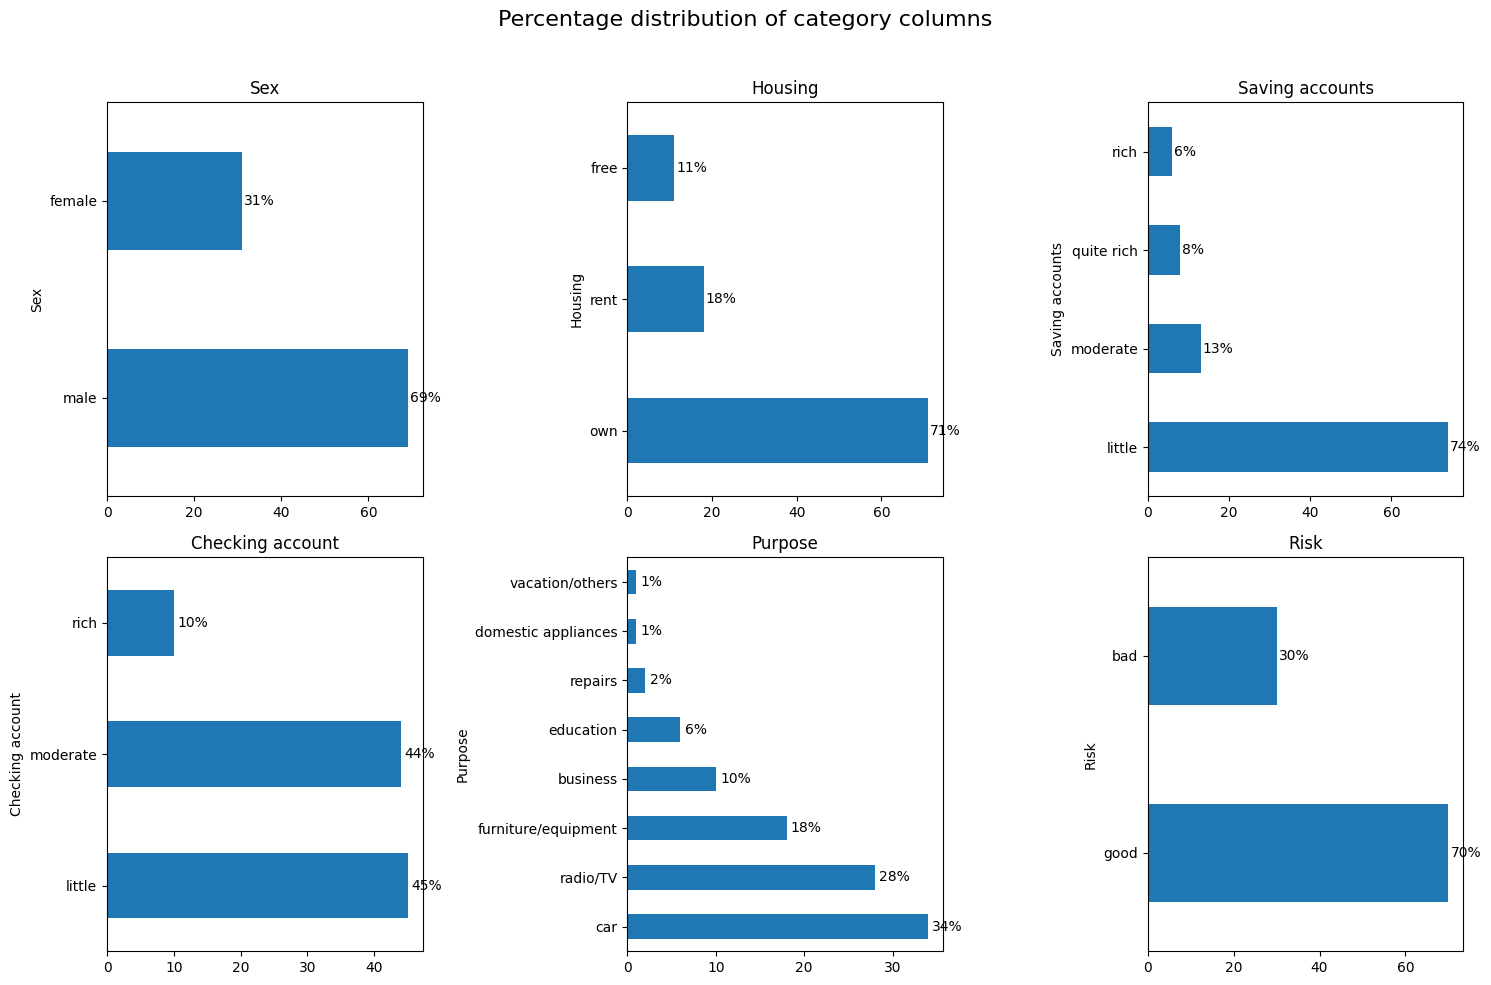

In [17]:
#Function to calculate the percentage of each category

def percentage_calculation(df):
  percentages = {}

  for col in categorical_columns:
    value_counts = df[col].value_counts(normalize=True) * 100
    percentages[col] = value_counts.round(0).astype(int)

  return percentages

# Calculate percentage for each categorical column
category_percentages = percentage_calculation(df)

# Plotting the percentages in subplots
num_plots = len(category_percentages)
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
fig.suptitle('Percentage distribution of category columns', fontsize=16)

for i, (col, percentages) in enumerate(category_percentages.items()):
    ax = axes[i // num_cols, i % num_cols]
    bars=percentages.plot(kind='barh', ax=ax)
    ax.set_title(col)

# Adding data labels
    for bar in bars.patches:
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width():.0f}%', va='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the common title
plt.show()


# *Insights from statistics summary*

*   The bank seems to have 70% of Male clients & the rest 30% female clients, whereas 73% of the account holders are in the age group of 20-40
*   63% of the clients are skilled professionals, While 2/3rd are home owners with little savings account balance, 80% of them has from little to moderate balance in their checkings account
*   3/4th (80%) of the accounts hold less than $5000 in credit loan for the durtion of 0-2 years & the top reasons for their loans are for purchasing car & home appliances followed by furniture/equipment

In [18]:
# Binning age into different category
interval = [18, 25, 35, 60, 120]
cats = ['Student', 'Young', 'Adult', 'Senior']

# Creating the Age_cat column with categorized age groups
df["Age_cat"] = pd.cut(df["Age"], bins=interval, labels=cats, right=False, include_lowest=True)

df.head(10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,2,free,little,little,4870,24,car,bad,Adult
5,35,male,1,free,NaN,NaN,9055,36,education,good,Adult
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Adult
7,35,male,3,rent,little,moderate,6948,36,car,good,Adult
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,Senior
9,28,male,3,own,little,moderate,5234,30,car,bad,Young


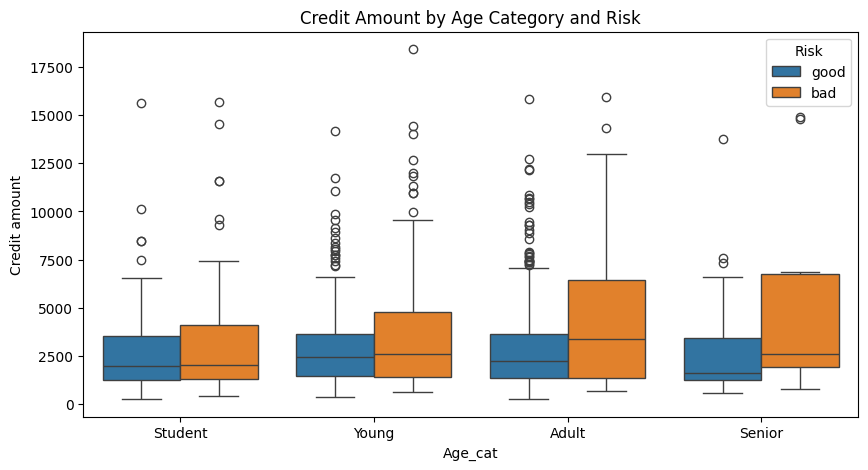

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age_cat', y='Credit amount', hue='Risk', data=df)
plt.title('Credit Amount by Age Category and Risk')
plt.show()

# **KPIs & Metrics for Credit Risk Analysis** - To understand the credit worthiness of accounts & to access risk


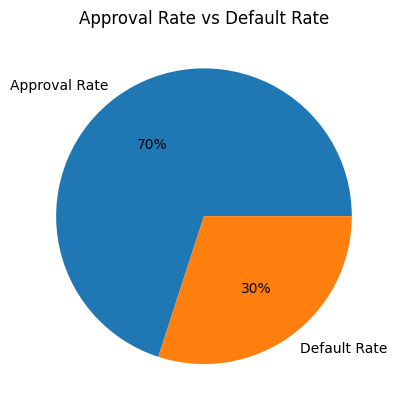

In [20]:
#Default Rate(Bad risk rate) & Approval Rate(Good risk rate)
default_rate = df['Risk'].value_counts(normalize=True)['bad'] * 100
approval_rate = df['Risk'].value_counts(normalize=True)['good'] * 100

labels = ['Approval Rate', 'Default Rate']
values = [approval_rate, default_rate]

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Approval Rate vs Default Rate')
plt.show()


Total credit amount 3271258
Total credit amount good 2089820
Total credit amount bad 1181438


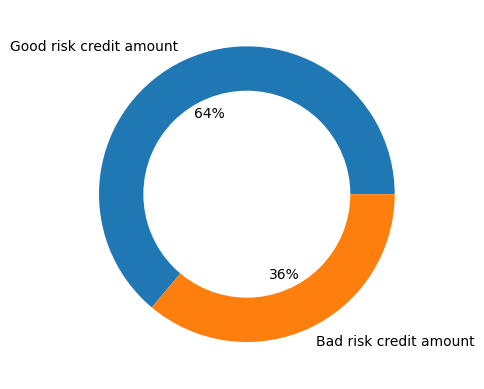

In [21]:
#Total credit amount distribution by risk
Tot_credit_amount = df['Credit amount'].sum()
Tot_credit_amount_good = df[df['Risk']== 'good']['Credit amount'].sum()
Tot_credit_amount_bad = df[df['Risk']== 'bad']['Credit amount'].sum()

print('Total credit amount',Tot_credit_amount)
print('Total credit amount good',Tot_credit_amount_good)
print('Total credit amount bad',Tot_credit_amount_bad)

labels = ['Good risk credit amount', 'Bad risk credit amount']
values = [Tot_credit_amount_good, Tot_credit_amount_bad]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.0f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)


Average duration (Months):  20.9
Average duration for good risk applications:  19.2
Average duration for bad risk applications:  24.9


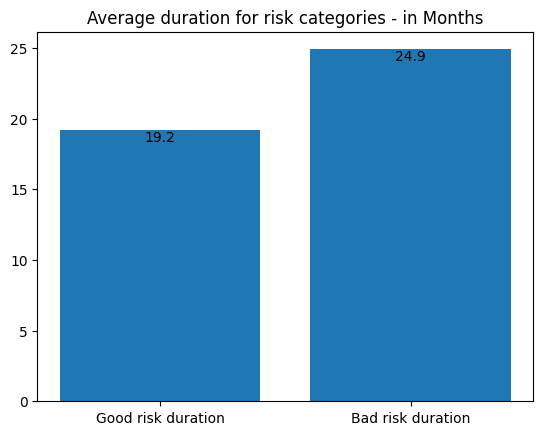

In [37]:
#Average duration for risk categories
avg_duration = df['Duration'].mean()
avg_duration_good = df[df['Risk']=='good']['Duration'].mean().round(1)
avg_duration_bad = df[df['Risk']=='bad']['Duration'].mean().round(1)

print(f'Average duration (Months): {avg_duration: .1f}')
print(f'Average duration for good risk applications: {avg_duration_good: .1f}')
print(f'Average duration for bad risk applications: {avg_duration_bad: .1f}')

labels = ['Good risk duration', 'Bad risk duration']
values = [avg_duration_good, avg_duration_bad]

plt.bar(labels, values)

# Add data labels on top of each bar
for i, value in enumerate(values):
    plt.text(i, value - 1,  # x position and y position
             str(value),     # the label to be displayed
             ha='center',    # horizontal alignment
             va='bottom')    # vertical alignment

plt.title('Average duration for risk categories - in Months')
plt.show()

Risk  bad  good
Job            
0       7    15
1      56   144
2     186   444
3      51    97


<ipython-input-23-0d80393e6070>:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Job', y='Risk', data=df, inner='quartile', scale='count')


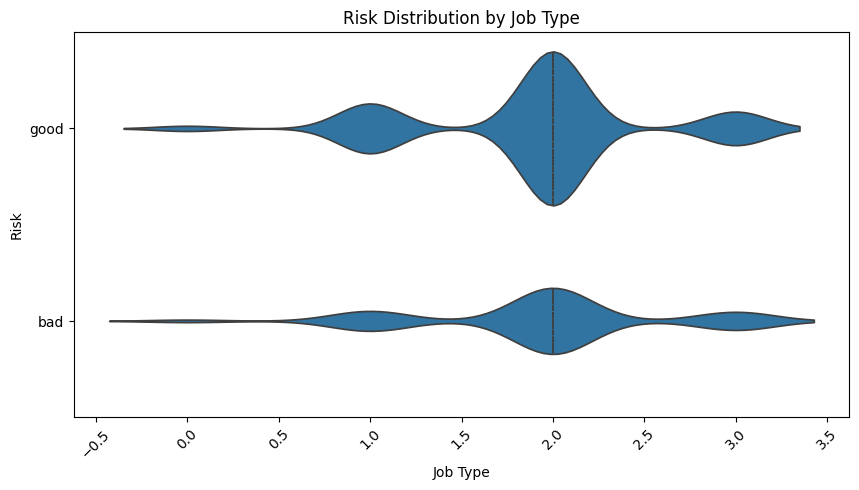

In [23]:
#Risk Distribution by Job Type
risk_by_job = df.groupby(['Job', 'Risk']).size().unstack(fill_value=0)
print(risk_by_job)


# Plotting the data
plt.figure(figsize=(10, 5))
sns.violinplot(x='Job', y='Risk', data=df, inner='quartile', scale='count')
plt.title('Risk Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Risk')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

Risk     bad  good
Housing           
free      44    64
own      186   527
rent      70   109


<ipython-input-24-2ffe6394924a>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Housing',y='Risk', data= df, inner='quartile', scale='count')


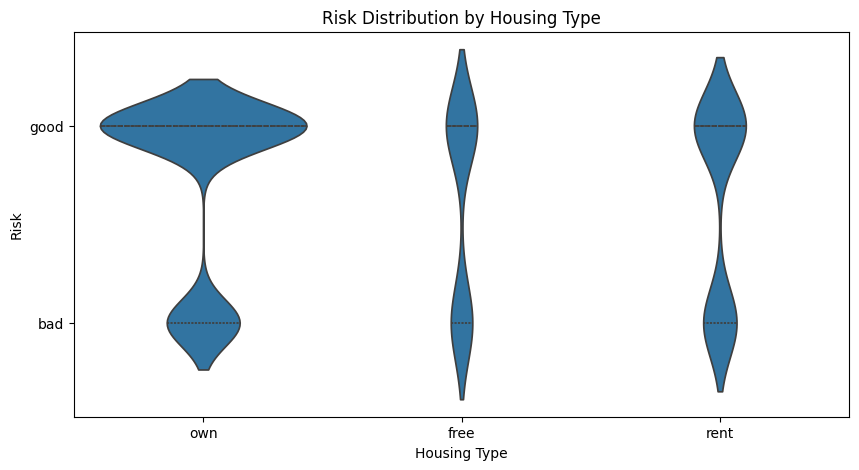

In [24]:
#Risk Distribution by Housing Type
risk_by_housing = df.groupby(['Housing','Risk']).size().unstack(fill_value=0)
print(risk_by_housing)

plt.figure(figsize=(10,5))
sns.violinplot(x='Housing',y='Risk', data= df, inner='quartile', scale='count')
plt.title('Risk Distribution by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Risk')
plt.show()

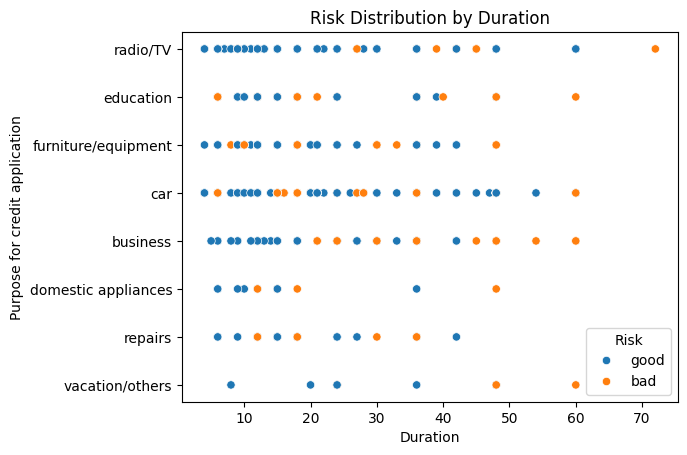

In [25]:
#Risk distribution by duration & Purpose

plt.figure.fgsize=(10,5)
sns.scatterplot(x='Duration', y='Purpose', hue='Risk', data=df)
plt.title('Risk Distribution by Duration')
plt.xlabel('Duration')
plt.ylabel('Purpose for credit application')
plt.show()

<Figure size 1200x800 with 0 Axes>

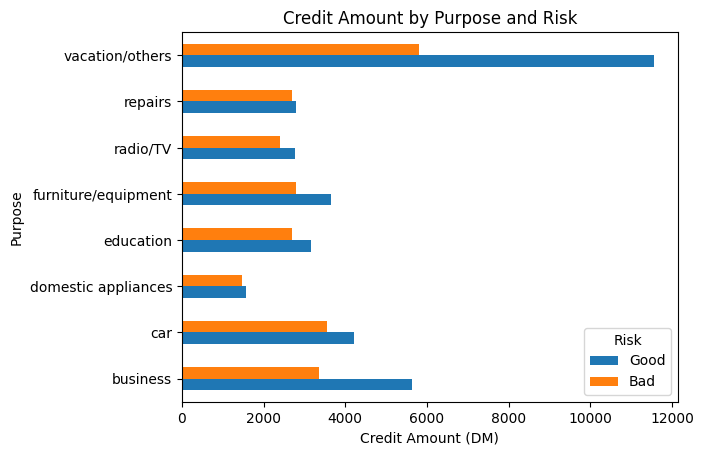

In [26]:
# Grouping by Purpose and Risk, and calculating mean credit amount
credit_by_purpose_risk = df.groupby(['Purpose', 'Risk'])['Credit amount'].mean().unstack()

# Plotting the data as a horizontal clustered bar plot
plt.figure(figsize=(12, 8))
credit_by_purpose_risk.plot(kind='barh', stacked=False)
plt.title('Credit Amount by Purpose and Risk')
plt.xlabel('Credit Amount (DM)')
plt.ylabel('Purpose')
plt.legend(title='Risk', labels=['Good', 'Bad'])
plt.show()

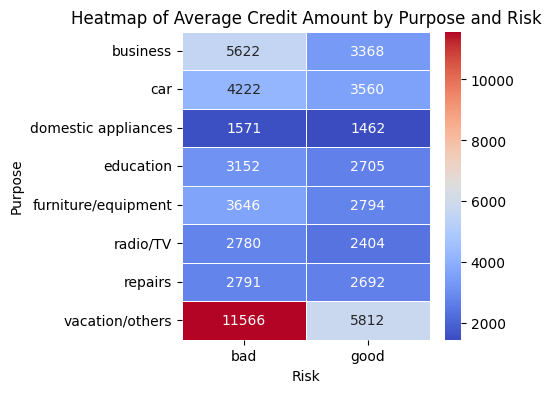

In [27]:
# Pivot the table to create a matrix of Purpose vs. Risk with mean Credit amount
pivot_table = df.pivot_table(values='Credit amount', index='Purpose', columns='Risk', aggfunc='mean', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Average Credit Amount by Purpose and Risk')
plt.xlabel('Risk')
plt.ylabel('Purpose')
plt.show()

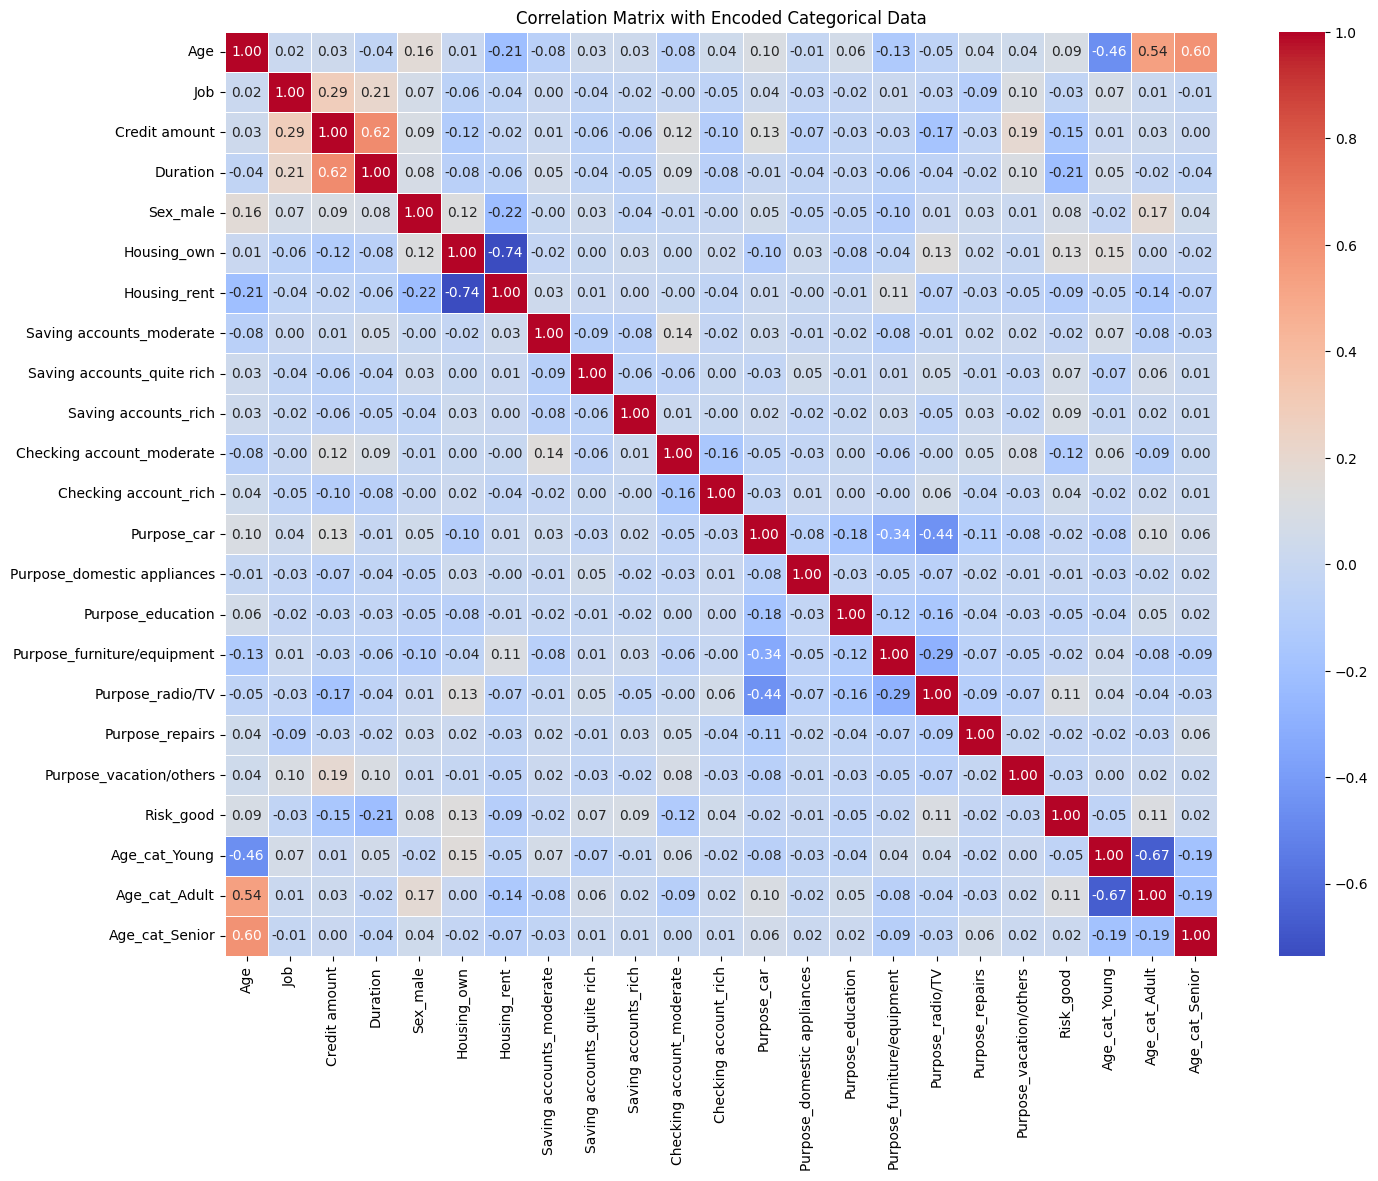

In [28]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix with Encoded Categorical Data')
plt.show()

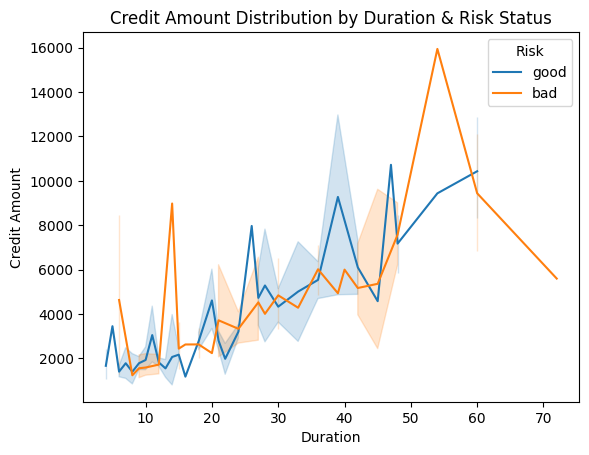

In [29]:
#Credit amount distribution by duration & Risk status

plt.figure.fgsize=(10,5)
sns.lineplot(x='Duration', y='Credit amount', hue='Risk', data=df)
plt.title('Credit Amount Distribution by Duration & Risk Status')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.show()


<Figure size 1500x1000 with 0 Axes>

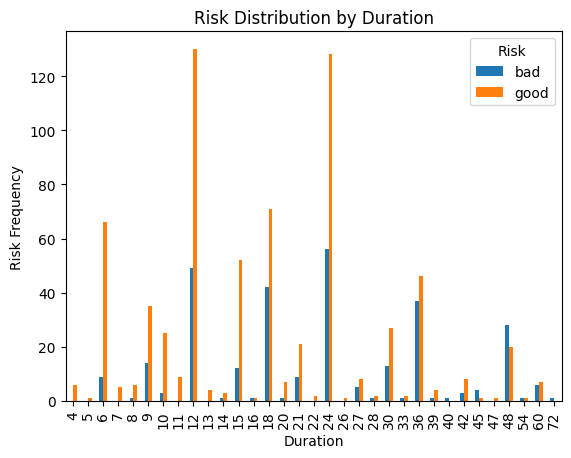

In [30]:
#Risk Distribution by Duration
risk_by_duration = df.groupby(['Duration','Risk']).size().unstack(fill_value=0)

plt.figure(figsize=(15,10))
risk_by_duration.plot(kind='bar', stacked=False)
plt.title('Risk Distribution by Duration')
plt.xlabel('Duration')
plt.ylabel('Risk Frequency')
plt.show()

In [31]:
# Handling missing values in the categorical columns

impute_columns = ['Saving accounts', 'Checking account']
imputer = SimpleImputer(strategy='most_frequent')
df[impute_columns] = imputer.fit_transform(df[impute_columns])


In [43]:
df_new = pd.DataFrame(df)

# Define categorical columns
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Apply get_dummies for each categorical column and merge back into df
df_new = pd.get_dummies(df_new, columns=categorical_columns, drop_first=True)

# Print the updated DataFrame
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          1000 non-null   int64   
 1   Job                          1000 non-null   int64   
 2   Credit amount                1000 non-null   int64   
 3   Duration                     1000 non-null   int64   
 4   Age_cat                      1000 non-null   category
 5   Sex_male                     1000 non-null   bool    
 6   Housing_own                  1000 non-null   bool    
 7   Housing_rent                 1000 non-null   bool    
 8   Saving accounts_moderate     1000 non-null   bool    
 9   Saving accounts_quite rich   1000 non-null   bool    
 10  Saving accounts_rich         1000 non-null   bool    
 11  Checking account_moderate    1000 non-null   bool    
 12  Checking account_rich        1000 non-null   bool    
 13  Purp

In [44]:
X = df_new.drop(columns=['Risk_good','Age_cat'])
y = df_new['Risk_good']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Identify numeric columns
numeric_columns = ['Age', 'Job', 'Credit amount', 'Duration']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [46]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [47]:
# Evaluate the model
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.705
ROC AUC Score: 0.6500781343911527
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.25      0.34        59
        True       0.74      0.89      0.81       141

    accuracy                           0.70       200
   macro avg       0.62      0.57      0.57       200
weighted avg       0.67      0.70      0.67       200



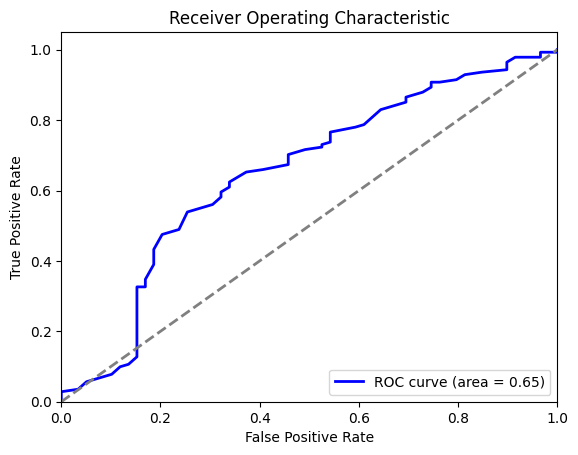

In [49]:
# Calculate ROC curve to illustrate the diagnostic ability of a binary classifier system
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


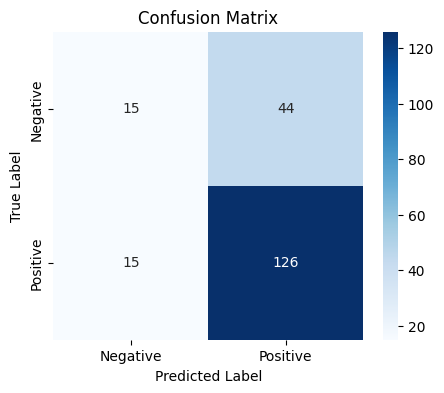

In [52]:
# Calculate confusion matrix to show the number of correct and incorrect predictions broken down by each class.
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()